# Data Cleaning to choose data sets to use

In [1]:
#loading the necesssary libraries
import pandas as pd
import csv
import sqlite3
import numpy as np

# Loading and understanding the data sets

# rt_movie_df

In [2]:
rt_movie_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep = '\t')
# this is information about the rt_movie_df
rt_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [3]:
rt_movie_df.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [4]:
print("The 'rt_movie_df' has 1560 rows with 12 columns, the column names are: {}".format(rt_movie_df.columns))

The 'rt_movie_df' has 1560 rows with 12 columns, the column names are: Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


In [5]:
#The column names are
rt_movie_df.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [6]:
print("In the 'rt_movie_df', all the columns except 'id' have missing values")

In the 'rt_movie_df', all the columns except 'id' have missing values


In [7]:
rt_movie_df.head() # the first five rows of the data set

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [8]:
rt_movie_df.tail() #the last five rows of the data set

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [9]:
rt_movie_df.rating.value_counts() # this shows the value counts for the various ratings of the movies in this data set
print("The ratings are basically general, parental guidance, parental guidance for those below 13 years of age among others")

The ratings are basically general, parental guidance, parental guidance for those below 13 years of age among others


In [10]:
rt_movie_df.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [11]:
rt_movie_df.dropna(subset = ['synopsis', 'rating', 'genre',
                            ], axis = 0, inplace = True)
# this code removes the missing values in the columns where data cannot be filled

In [12]:
rt_movie_df.drop(['currency', 'box_office', 'studio'], axis = 1, inplace = True)

In [13]:
rt_movie_df.fillna(rt_movie_df['director'].mode()[0], inplace = True)
# filling the missig values of some rows using the mode

In [14]:
rt_movie_df.duplicated().sum() # this data set has no duplicates

0

In [15]:
rt_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1495 non-null   int64 
 1   synopsis      1495 non-null   object
 2   rating        1495 non-null   object
 3   genre         1495 non-null   object
 4   director      1495 non-null   object
 5   writer        1495 non-null   object
 6   theater_date  1495 non-null   object
 7   dvd_date      1495 non-null   object
 8   runtime       1495 non-null   object
dtypes: int64(1), object(8)
memory usage: 116.8+ KB


In [16]:
#replacing an inconsistent runtime with the mode
rt_movie_df['runtime_mins'] = rt_movie_df['runtime'].str.replace('Steven Spielberg', rt_movie_df['runtime'].mode()[0])

In [17]:
rt_movie_df['runtime_mins'] = rt_movie_df['runtime_mins'].str.replace('minutes','')
rt_movie_df.runtime_mins.unique()

array(['104 ', '108 ', '116 ', '128 ', '95 ', '82 ', '123 ', '117 ',
       '90 ', '97 ', '106 ', '129 ', '98 ', '127 ', '96 ', '101 ', '114 ',
       '110 ', '65 ', '75 ', '92 ', '91 ', '73 ', '100 ', '99 ', '103 ',
       '112 ', '142 ', '119 ', '122 ', '86 ', '93 ', '111 ', '118 ',
       '89 ', '74 ', '115 ', '107 ', '165 ', '113 ', '186 ', '67 ',
       '102 ', '60 ', '135 ', '109 ', '70 ', '124 ', '105 ', '134 ',
       '80 ', '87 ', '167 ', '77 ', '81 ', '94 ', '188 ', '126 ', '63 ',
       '132 ', '137 ', '79 ', '156 ', '147 ', '54 ', '85 ', '15 ', '171 ',
       '59 ', '120 ', '88 ', '143 ', '133 ', '52 ', '83 ', '155 ', '121 ',
       '125 ', '146 ', '196 ', '78 ', '158 ', '69 ', '153 ', '145 ',
       '76 ', '84 ', '45 ', '179 ', '130 ', '64 ', '138 ', '175 ', '174 ',
       '144 ', '184 ', '150 ', '313 ', '164 ', '11 ', '148 ', '6 ', '71 ',
       '23 ', '157 ', '141 ', '358 ', '61 ', '192 ', '154 ', '166 ',
       '140 ', '57 ', '170 ', '205 ', '159 ', '136 ', '10 ', '58 '

In [18]:
#type casting runtime to int
rt_movie_df['runtime_mins'] = rt_movie_df['runtime_mins'].map(int)
rt_movie_df.runtime_mins.unique()

array([104, 108, 116, 128,  95,  82, 123, 117,  90,  97, 106, 129,  98,
       127,  96, 101, 114, 110,  65,  75,  92,  91,  73, 100,  99, 103,
       112, 142, 119, 122,  86,  93, 111, 118,  89,  74, 115, 107, 165,
       113, 186,  67, 102,  60, 135, 109,  70, 124, 105, 134,  80,  87,
       167,  77,  81,  94, 188, 126,  63, 132, 137,  79, 156, 147,  54,
        85,  15, 171,  59, 120,  88, 143, 133,  52,  83, 155, 121, 125,
       146, 196,  78, 158,  69, 153, 145,  76,  84,  45, 179, 130,  64,
       138, 175, 174, 144, 184, 150, 313, 164,  11, 148,   6,  71,  23,
       157, 141, 358,  61, 192, 154, 166, 140,  57, 170, 205, 159, 136,
        10,  58, 178, 240, 149, 180, 139, 294, 161,  72,  56, 183, 195,
       131, 229,   5,  68, 290], dtype=int64)

In [19]:
rt_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 0 to 1559
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1495 non-null   int64 
 1   synopsis      1495 non-null   object
 2   rating        1495 non-null   object
 3   genre         1495 non-null   object
 4   director      1495 non-null   object
 5   writer        1495 non-null   object
 6   theater_date  1495 non-null   object
 7   dvd_date      1495 non-null   object
 8   runtime       1495 non-null   object
 9   runtime_mins  1495 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 128.5+ KB


The data set is now clean enough

# bom_movie_gross_df

In [20]:
bom_movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
#this is infomation about bom_movie_gross_df
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [21]:
bom_movie_gross_df.head() # the first five rows

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [22]:
bom_movie_gross_df.title.unique()

array(['Toy Story 3', 'Alice in Wonderland (2010)',
       'Harry Potter and the Deathly Hallows Part 1', ..., 'El Pacto',
       'The Swan', 'An Actor Prepares'], dtype=object)

In [23]:
bom_movie_gross_df.describe() # descriptive statistics on the data

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [24]:
print("There are 3387 rows with 5 columns in the 'bom_movie_gross' \
data set, the column names are {}".format(bom_movie_gross_df.columns))

There are 3387 rows with 5 columns in the 'bom_movie_gross' data set, the column names are Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [25]:
"""
There are three columns with missing values in 'bom_movie_gross', the columns are: studio, domestic_gross, foreign_gross
"""

"\nThere are three columns with missing values in 'bom_movie_gross', the columns are: studio, domestic_gross, foreign_gross\n"

In [26]:
bom_movie_gross_df.tail() # the last five rows of the data

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [27]:
bom_movie_gross_df.isna().sum() #this is the number of missing values in each column

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [28]:
#changing the data type of foreign gross from object to float
#bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].map()
bom_movie_gross_df['foreign_gross'].dtype

dtype('O')

In [29]:
bom_movie_gross_df.foreign_gross.unique()

array(['652000000', '691300000', '664300000', ..., '530000', '256000',
       '30000'], dtype=object)

In [30]:
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].map(float)

ValueError: could not convert string to float: '1,131.6'

In [31]:
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].str.replace(',.', '')
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].map(float)

In [32]:
bom_movie_gross_df.foreign_gross.dtype #confirming that type has changed to float

dtype('float64')

In [33]:
bom_movie_gross_df.dropna(subset = ['studio'], axis = 0, inplace = True)
#.fillna(bom_movie_gross_df['domestic_gross'].mean(), inplace = True)
bom_movie_gross_df.fillna(bom_movie_gross_df['foreign_gross'].mean(), inplace = True)
#filling missing values of domestic gross with its mean

In [34]:
bom_movie_gross_df.duplicated().sum() # no duplicates in this data set

0

In [35]:
bom_movie_gross_df.fillna(bom_movie_gross_df['domestic_gross'].mean(), inplace = True)

In [36]:
bom_movie_gross_df.info() #now I have a cleaned data set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


In [37]:
bom_movie_gross_df.rename(columns = {'domestic_gross': 'domestic_gross_usd',
                                    'foreign_gross': 'foreign_gross_usd'}, inplace = True)
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               3382 non-null   object 
 1   studio              3382 non-null   object 
 2   domestic_gross_usd  3382 non-null   float64
 3   foreign_gross_usd   3382 non-null   float64
 4   year                3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


In [38]:
bom_movie_gross_df.describe()

,domestic_gross_usd,foreign_gross_usd,year
count,3.382000e+03,3.382000e+03,3382.000000
mean,2.912654e+07,7.495490e+07,2013.959787
std,6.687061e+07,1.066075e+08,2.477735
min,1.000000e+02,1.100000e+02,2010.000000
25%,1.230000e+05,1.170000e+07,2012.000000
50%,1.400000e+06,7.495490e+07,2014.000000
75%,2.995000e+07,7.495490e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


The data set is now clean enough

# rt_reviews_df

In [39]:
rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep = '\t', encoding = 'latin1')
#this is information about tsv_reviews_df
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [40]:
rt_reviews_df.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [41]:
rt_reviews_df.head() #the first five rows of the data set

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [42]:
rt_reviews_df.tail() # the last five rows of the data set

,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [43]:
rt_reviews_df.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [44]:
rt_reviews_df.rating.unique() # cannot cast the type of data from object to float, hence I will drop

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

In [45]:
#dropping missing values and difficult columns
rt_reviews_df.drop(['rating'], axis = 1, inplace = True)
rt_reviews_df.dropna(subset = ['review'], axis = 0, inplace = True)

In [46]:
#filling values of critic and publisher using their mode
rt_reviews_df.fillna(rt_reviews_df['critic'].mode()[0], inplace = True)

In [47]:
rt_reviews_df.duplicated().sum() # shows the total number of duplicates

2

In [48]:
#dropping the duplicated rows from the data set
rt_reviews_df.drop_duplicates(inplace = True)
rt_reviews_df.duplicated().sum()

0

In [49]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48867 entries, 0 to 54427
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          48867 non-null  int64 
 1   review      48867 non-null  object
 2   fresh       48867 non-null  object
 3   critic      48867 non-null  object
 4   top_critic  48867 non-null  int64 
 5   publisher   48867 non-null  object
 6   date        48867 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.0+ MB


The data is now clean enough

# sql data sets¶

In [50]:
import sqlite3
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

In [51]:
cur.execute("""
SELECT name
  FROM sqlite_master
 WHERE type = 'table'
""")
table_names = cur.fetchall()
table_names #these are the table names in this data base

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [52]:
! ls

Data Understanding.ipynb
Microsoft Movie Reccomendation Project.ipynb
README.md
data.sqlite
im.db
zippedData


# movie_basics_df

In [54]:
movie_basics_df = pd.read_sql("""
SELECT *
  FROM movie_basics;
""", conn)
movie_basics_df.head() # the firs five rows of teh data set

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [55]:
movie_basics_df.tail()# the last five rows of the data set

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [56]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [57]:
movie_basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [58]:
movie_basics_df.primary_title.unique()

array(['Sunghursh', 'One Day Before the Rainy Season',
       'The Other Side of the Wind', ..., 'Dankyavar Danka', '6 Gunn',
       'Chico Albuquerque - Revelações'], dtype=object)

In [59]:
movie_basics_df.isna().sum()#shows the total missing values by columns

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [60]:
movie_basics_df.drop(['original_title'], axis = 1, inplace = True)
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.6+ MB


In [61]:
movie_basics_df.dropna(subset = ['genres'], axis = 0, inplace = True)
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         140736 non-null  object 
 1   primary_title    140736 non-null  object 
 2   start_year       140736 non-null  int64  
 3   runtime_minutes  112233 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.4+ MB


In [62]:
movie_basics_df.dropna(subset = ['runtime_minutes'], axis = 0, inplace = True)
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112233 entries, 0 to 146139
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112233 non-null  object 
 1   primary_title    112233 non-null  object 
 2   start_year       112233 non-null  int64  
 3   runtime_minutes  112233 non-null  float64
 4   genres           112233 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.1+ MB


In [63]:
movie_basics_df.duplicated().sum() #checking for duplicates

0

The data set 'movie_basics_df' has no duplicates and is now clean

# movie_ratings_df

In [64]:
movie_ratings_df = pd.read_sql("""
SELECT *
  FROM movie_ratings;
""",conn)
movie_ratings_df.head() #the first five rows of the data set

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [65]:
movie_ratings_df.tail() # the last five rows of the data set

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [66]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [67]:
movie_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [68]:
movie_ratings_df.isna().sum()#checking for missing values

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [69]:
movie_ratings_df.duplicated().sum() #checking for duplicates

0

The data set 'movie_ratings_df' has no missing values or duplicates, it is clean enough

# Movie_directors

In [70]:
movie_directors_df = pd.read_sql("""
SELECT primary_name, movie_id
  FROM persons
  LEFT JOIN directors
  USING(person_id);
""", conn)
movie_directors_df.head()

,primary_name,movie_id
0,Mary Ellen Bauder,None
1,Joseph Bauer,None
2,Bruce Baum,None
3,Axel Baumann,None
4,Pete Baxter,None


The fact that there are only 5 directors,

# tmdb_movies_df

In [71]:
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [72]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [73]:
tmdb_movies_df.head() # the first five words of the data set

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [74]:
tmdb_movies_df.tail() # the last five words of the data set

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [75]:
tmdb_movies_df.drop(tmdb_movies_df.columns[0], axis = 1, inplace = True)
tmdb_movies_df.rename(columns = {'original_title': 'movie'}, inplace = True)
#change he column name in order to facilitate a merger betweeen 'tmdb_movies_df' and 'tn_movie_budgets'

In [76]:
tmdb_movies_df.drop(tmdb_movies_df.columns[1], axis = 1, inplace = True)

In [77]:
tmdb_movies_df.head()

,genre_ids,original_language,movie,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [78]:
tmdb_movies_df.isna().sum() #checking for missing values

genre_ids            0
original_language    0
movie                0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [79]:
tmdb_movies_df.duplicated().sum() #checking for duplicates

1020

In [80]:
#dropping duplicates
tmdb_movies_df.drop_duplicates(inplace = True)
tmdb_movies_df.duplicated().sum()

0

In [81]:
tmdb_movies_df.genre_ids.value_counts()
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   original_language  25497 non-null  object 
 2   movie              25497 non-null  object 
 3   popularity         25497 non-null  float64
 4   release_date       25497 non-null  object 
 5   title              25497 non-null  object 
 6   vote_average       25497 non-null  float64
 7   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 1.8+ MB


The data set 'tmdb_movies_df' is now clean enough

# tn_movie_budgets_df

In [82]:
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie_budgets_df.head() #the first five rows

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [83]:
tn_movie_budgets_df.tail() #the last five rows

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [84]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [85]:
#strip the dollar signs in order to prepare for replacement
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.strip('$,')
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.strip('$,')
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.strip('$,')

In [86]:
#replace the punctuation to facilitate type casting into int
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace(',', '')
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace(',', '')
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace(',', '')

In [87]:
#type casting to int
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].map(int)
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].map(int)
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].map(int)

In [88]:
#renaming to capture the unit of currency
tn_movie_budgets_df.rename(columns = {'worldwide_gross':'worldwide_gross_usd',
                                     'production_budget': 'production_budget_usd',
                                     'domestic_gross': 'domestic_gross_usd',
                                     'movie':'title'},
                           inplace = True)

In [89]:
tn_movie_budgets_df.describe()

,id,production_budget_usd,domestic_gross_usd,worldwide_gross_usd
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [90]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     5782 non-null   int64 
 1   release_date           5782 non-null   object
 2   title                  5782 non-null   object
 3   production_budget_usd  5782 non-null   int64 
 4   domestic_gross_usd     5782 non-null   int64 
 5   worldwide_gross_usd    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [91]:
print("The columns of tn_movies_budgets_df.info are : {} \
and there are no missing values in this dataframe".format(tn_movie_budgets_df.columns))

The columns of tn_movies_budgets_df.info are : Index(['id', 'release_date', 'title', 'production_budget_usd',
       'domestic_gross_usd', 'worldwide_gross_usd'],
      dtype='object') and there are no missing values in this dataframe


The data is now clean enough

# Combining data frames¶

# rt_movies_df with rt_reviews_df

In [92]:
rt_reviews_movies_df = rt_reviews_df.merge(rt_movie_df, on = 'id', how = 'left')
rt_reviews_movies_df.head()

,id,review,fresh,critic,top_critic,publisher,date,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,runtime_mins
0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,108.0
1,3,It's an allegory in search of a meaning that n...,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,108.0
2,3,... life lived in a bubble in financial dealin...,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,108.0
3,3,Continuing along a line introduced in last yea...,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,108.0
4,3,... a perverse twist on neorealism...,fresh,Dennis Schwartz,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,108.0


In [93]:
rt_reviews_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48867 entries, 0 to 48866
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            48867 non-null  int64  
 1   review        48867 non-null  object 
 2   fresh         48867 non-null  object 
 3   critic        48867 non-null  object 
 4   top_critic    48867 non-null  int64  
 5   publisher     48867 non-null  object 
 6   date          48867 non-null  object 
 7   synopsis      48753 non-null  object 
 8   rating        48753 non-null  object 
 9   genre         48753 non-null  object 
 10  director      48753 non-null  object 
 11  writer        48753 non-null  object 
 12  theater_date  48753 non-null  object 
 13  dvd_date      48753 non-null  object 
 14  runtime       48753 non-null  object 
 15  runtime_mins  48753 non-null  float64
dtypes: float64(1), int64(2), object(13)
memory usage: 6.3+ MB


In [94]:
rt_reviews_movies_df.isna().sum() #checking for missing values

id                0
review            0
fresh             0
critic            0
top_critic        0
publisher         0
date              0
synopsis        114
rating          114
genre           114
director        114
writer          114
theater_date    114
dvd_date        114
runtime         114
runtime_mins    114
dtype: int64

In [95]:
#removing rows with missing values
rt_reviews_movies_df.dropna(subset = ['synopsis', 'rating', 'genre', 'director',
                                   'writer', 'theater_date', 'dvd_date','runtime_mins'],
                        axis = 0, inplace = True)

In [96]:
rt_reviews_movies_df.duplicated().sum() #checking for duplicates

0

In [97]:
rt_reviews_movies_df.info()#there are now missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48753 entries, 0 to 48866
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            48753 non-null  int64  
 1   review        48753 non-null  object 
 2   fresh         48753 non-null  object 
 3   critic        48753 non-null  object 
 4   top_critic    48753 non-null  int64  
 5   publisher     48753 non-null  object 
 6   date          48753 non-null  object 
 7   synopsis      48753 non-null  object 
 8   rating        48753 non-null  object 
 9   genre         48753 non-null  object 
 10  director      48753 non-null  object 
 11  writer        48753 non-null  object 
 12  theater_date  48753 non-null  object 
 13  dvd_date      48753 non-null  object 
 14  runtime       48753 non-null  object 
 15  runtime_mins  48753 non-null  float64
dtypes: float64(1), int64(2), object(13)
memory usage: 6.3+ MB


In [98]:
rt_reviews_movies_df.duplicated().sum()

0

This data set has no missing values and is now clean enough

# tn_movie_and_budgets_df

In [99]:
tn_movie_and_budgets_df = tmdb_movies_df.merge(tn_movie_budgets_df, on = 'title', 
                                               how = 'inner')
tn_movie_and_budgets_df.head() # the first five rows of the data set

,genre_ids,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,id,release_date_y,production_budget_usd,domestic_gross_usd,worldwide_gross_usd
0,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,"Mar 26, 2010",165000000,217581232,494870992
1,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,"May 7, 2010",170000000,312433331,621156389
2,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995",30000000,191796233,364545516
3,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,"Jul 16, 2010",160000000,292576195,835524642
4,"[12, 14, 10751]",en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,17,"Feb 12, 2010",95000000,88768303,223050874


In [100]:
tn_movie_and_budgets_df.tail() # the last five rows of the data set

,genre_ids,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,id,release_date_y,production_budget_usd,domestic_gross_usd,worldwide_gross_usd
2206,[],en,The Box,0.600,2018-03-04,The Box,8.0,1,66,"Nov 6, 2009",25000000,15051977,34356760
2207,[10402],en,The Box,0.600,2018-03-04,The Box,6.0,1,66,"Nov 6, 2009",25000000,15051977,34356760
2208,"[35, 16]",en,Enough,0.719,2018-03-22,Enough,8.7,3,68,"May 24, 2002",38000000,39177215,50970660
2209,[],en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,7,"Aug 26, 2005",9000000,1069318,1069318
2210,[16],en,Jaws,0.600,2018-05-29,Jaws,0.0,1,41,"Jun 20, 1975",12000000,260000000,470700000


In [101]:
tn_movie_and_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 2210
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   genre_ids              2211 non-null   object 
 1   original_language      2211 non-null   object 
 2   movie                  2211 non-null   object 
 3   popularity             2211 non-null   float64
 4   release_date_x         2211 non-null   object 
 5   title                  2211 non-null   object 
 6   vote_average           2211 non-null   float64
 7   vote_count             2211 non-null   int64  
 8   id                     2211 non-null   int64  
 9   release_date_y         2211 non-null   object 
 10  production_budget_usd  2211 non-null   int64  
 11  domestic_gross_usd     2211 non-null   int64  
 12  worldwide_gross_usd    2211 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 241.8+ KB


In [102]:
tn_movie_and_budgets_df.duplicated().sum()

0

In [103]:
tn_movie_and_budgets_df.describe()

,popularity,vote_average,vote_count,id,production_budget_usd,domestic_gross_usd,worldwide_gross_usd
count,2211.000000,2211.000000,2211.000000,2211.000000,2.211000e+03,2.211000e+03,2.211000e+03
mean,10.220433,6.160561,1583.261872,50.982813,3.743225e+07,4.881138e+07,1.181942e+08
std,8.277149,1.198733,2627.747812,28.517545,5.106638e+07,8.229205e+07,2.214593e+08
min,0.600000,0.000000,1.000000,1.000000,9.000000e+03,0.000000e+00,0.000000e+00
25%,4.185500,5.600000,40.000000,27.000000,5.000000e+06,6.696880e+05,2.750330e+06
50%,9.095000,6.200000,509.000000,51.000000,1.800000e+07,2.015730e+07,3.637470e+07
75%,13.935500,6.900000,1910.000000,76.000000,4.500000e+07,5.712866e+07,1.188940e+08
max,80.773000,10.000000,22186.000000,100.000000,4.250000e+08,7.605076e+08,2.776345e+09


In [104]:
tn_movie_and_budgets_df.isna().sum()#finding the number of missing values

genre_ids                0
original_language        0
movie                    0
popularity               0
release_date_x           0
title                    0
vote_average             0
vote_count               0
id                       0
release_date_y           0
production_budget_usd    0
domestic_gross_usd       0
worldwide_gross_usd      0
dtype: int64

In [105]:
tn_movie_and_budgets_df.duplicated().sum() # this gives the sum of the duplicates in this data set.

0

In [106]:
#removing unnecessary columns from the data sets:release_date_y, original language and title
tn_movie_and_budgets_df.drop(['release_date_y','original_language', 'title'], axis=1, inplace = True)
tn_movie_and_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 2210
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   genre_ids              2211 non-null   object 
 1   movie                  2211 non-null   object 
 2   popularity             2211 non-null   float64
 3   release_date_x         2211 non-null   object 
 4   vote_average           2211 non-null   float64
 5   vote_count             2211 non-null   int64  
 6   id                     2211 non-null   int64  
 7   production_budget_usd  2211 non-null   int64  
 8   domestic_gross_usd     2211 non-null   int64  
 9   worldwide_gross_usd    2211 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 190.0+ KB


In [107]:
tn_movie_and_budgets_df.rename(columns = {'movie':'title'}, inplace = True)
#changing the column name to facilitate a merger
tn_movie_and_budgets_df.head()

,genre_ids,title,popularity,release_date_x,vote_average,vote_count,id,production_budget_usd,domestic_gross_usd,worldwide_gross_usd
0,"[14, 12, 16, 10751]",How to Train Your Dragon,28.734,2010-03-26,7.7,7610,30,165000000,217581232,494870992
1,"[12, 28, 878]",Iron Man 2,28.515,2010-05-07,6.8,12368,15,170000000,312433331,621156389
2,"[16, 35, 10751]",Toy Story,28.005,1995-11-22,7.9,10174,37,30000000,191796233,364545516
3,"[28, 878, 12]",Inception,27.920,2010-07-16,8.3,22186,38,160000000,292576195,835524642
4,"[12, 14, 10751]",Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,6.1,4229,17,95000000,88768303,223050874


# movie_basics_and_ratings_df

In [108]:
movie_basics_and_ratings_df = movie_basics_df.merge(movie_ratings_df,
                                                    on ='movie_id', how = 'inner')
movie_basics_and_ratings_df.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [109]:
movie_basics_and_ratings_df.isna().sum()

movie_id           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [110]:
movie_basics_and_ratings_df.rename(columns = {'primary_title':'title'}, inplace = True)
#changing the column name to facilitate a merger
movie_basics_and_ratings_df.head()

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [111]:
movie_basics_and_ratings_df.tail() #the last five rows of the data set

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes
65715,tt9911774,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
65716,tt9913056,Swarm Season,2019,86.0,Documentary,6.2,5
65717,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
65719,tt9916160,Drømmeland,2019,72.0,Documentary,6.5,11


In [112]:
movie_basics_and_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 65719
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   title            65720 non-null  object 
 2   start_year       65720 non-null  int64  
 3   runtime_minutes  65720 non-null  float64
 4   genres           65720 non-null  object 
 5   averagerating    65720 non-null  float64
 6   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ MB


In [181]:
movie_basics_ratings_revenue_df = movie_basics_and_ratings_df.merge(tn_movie_budgets_df,
                                                                    on = 'title', how = 'inner')
movie_basics_ratings_revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2751
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_id               2752 non-null   object 
 1   title                  2752 non-null   object 
 2   start_year             2752 non-null   int64  
 3   runtime_minutes        2752 non-null   float64
 4   genres                 2752 non-null   object 
 5   averagerating          2752 non-null   float64
 6   numvotes               2752 non-null   int64  
 7   id                     2752 non-null   int64  
 8   release_date           2752 non-null   object 
 9   production_budget_usd  2752 non-null   int64  
 10  domestic_gross_usd     2752 non-null   int64  
 11  worldwide_gross_usd    2752 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 279.5+ KB


In [114]:
movie_basics_ratings_revenue_df.head() #the first five rows

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget_usd,domestic_gross_usd,worldwide_gross_usd
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",45000000,0,73706
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",25000000,720828,9313302
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",25000000,720828,9313302
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,17,"Mar 22, 2013",25000000,720828,9313302
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",91000000,58236838,187861183


In [115]:
movie_basics_ratings_revenue_df.tail()# the five last rows

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget_usd,domestic_gross_usd,worldwide_gross_usd
2747,tt8976472,Never Again,2018,69.0,"Documentary,Music",6.6,27,47,"Jul 12, 2002",500000,307631,308793
2748,tt8824064,Heroes,2019,88.0,Documentary,7.3,7,12,"Oct 24, 2008",400000,655538,655538
2749,tt8941440,Virus,2019,152.0,"Drama,Thriller",8.6,372,69,"Jan 15, 1999",75000000,14010690,30626690
2750,tt8976772,Push,2019,92.0,Documentary,7.3,33,70,"Feb 6, 2009",38000000,31811527,49678401
2751,tt9024106,Unplanned,2019,106.0,"Biography,Drama",6.3,5945,33,"Mar 29, 2019",6000000,18107621,18107621


In [116]:
movie_basics_ratings_revenue_df.describe() # summary statistics

,start_year,runtime_minutes,averagerating,numvotes,id,production_budget_usd,domestic_gross_usd,worldwide_gross_usd
count,2752.000000,2752.000000,2752.000000,2.752000e+03,2752.000000,2.752000e+03,2.752000e+03,2.752000e+03
mean,2013.901526,102.972020,6.243132,6.924085e+04,50.912064,3.473329e+07,4.358103e+07,1.043842e+08
std,2.535127,20.786121,1.168073,1.365289e+05,28.685200,4.822579e+07,7.484907e+07,2.034297e+08
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000,1.400000e+03,0.000000e+00,0.000000e+00
25%,2012.000000,90.000000,5.600000,2.240000e+02,27.000000,5.000000e+06,5.017520e+05,2.229406e+06
50%,2014.000000,101.000000,6.400000,1.041100e+04,51.000000,1.785000e+07,1.692842e+07,3.007543e+07
75%,2016.000000,113.250000,7.100000,8.028600e+04,76.000000,4.000000e+07,5.245237e+07,1.030832e+08
max,2019.000000,280.000000,9.200000,1.841066e+06,100.000000,4.250000e+08,7.605076e+08,2.776345e+09


# Answering the questions

# 1. Movie ratings based on genre

For this question, we shall use the movie_basics and movie_ratings merger from their respective tables in the im.db data base

In [117]:
# loading the necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [118]:
movie_basics_and_ratings_df.head()

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [119]:
movie_basics_and_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 65719
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   title            65720 non-null  object 
 2   start_year       65720 non-null  int64  
 3   runtime_minutes  65720 non-null  float64
 4   genres           65720 non-null  object 
 5   averagerating    65720 non-null  float64
 6   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ MB


Genre distribution, to establish which genre is the most watched.

In [121]:
#These are the top 50 most watched genres:
movie_basics_and_ratings_df.genres.value_counts()[:50]

Drama                            10189
Documentary                       9149
Comedy                            4604
Comedy,Drama                      2451
Horror                            2232
Drama,Romance                     1392
Thriller                          1288
Comedy,Drama,Romance              1159
Comedy,Romance                    1128
Horror,Thriller                    943
Drama,Thriller                     938
Action                             721
Biography,Documentary              675
Documentary,Drama                  572
Documentary,Music                  544
Action,Crime,Drama                 530
Romance                            529
Comedy,Horror                      515
Crime,Drama,Thriller               493
Biography,Documentary,History      476
Crime,Drama                        465
Documentary,History                460
Drama,Family                       459
Family                             419
Biography,Documentary,Drama        374
Horror,Mystery,Thriller  

In [155]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [156]:
plt.style.use('ggplot')

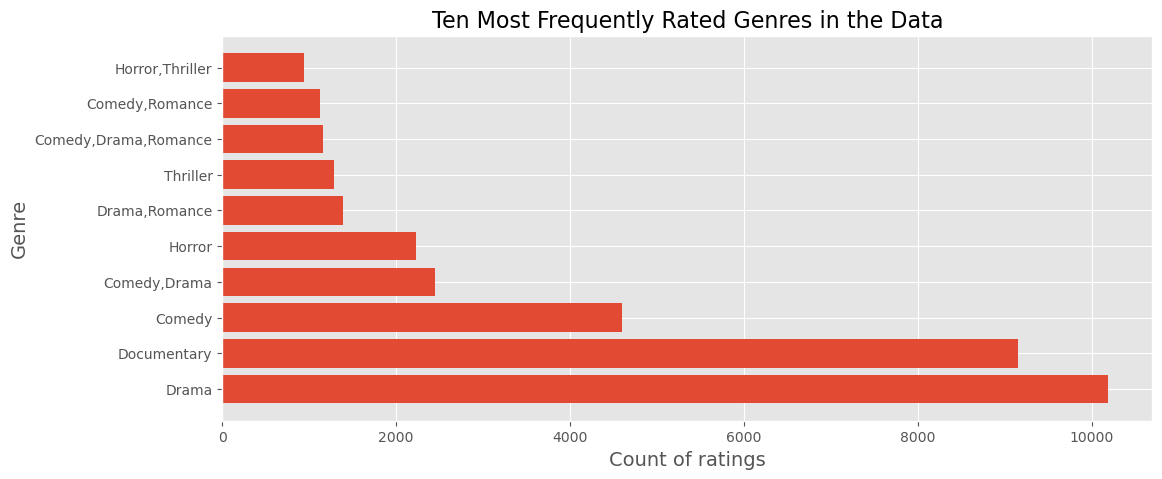

In [178]:
#The top ten most watched genre combinations:
top_ten_genres = movie_basics_and_ratings_df.groupby("genres").size().sort_values(ascending=False)[:10]
# movie_basics_and_ratings_df.genres.value_counts()[:20].plot.bar()

plt.figure(figsize=(12, 5))
plt.barh(y= top_ten_genres.index,
         width= top_ten_genres.values)
plt.title("Ten Most Frequently Rated Genres in the Data", fontsize=16)
plt.ylabel("Genre", fontsize=14)
plt.xlabel("Count of ratings", fontsize=14)
plt.show()

What is the distribution of genre among the top rated movies?

In [158]:
#set the value for movies considered to have high rating as the top 30th percentile
top_25_percentile_rated = movie_basics_and_ratings_df['averagerating'].quantile(.70)
top_25_percentile_rated

7.1

In [131]:
top_30th_percentile = movie_basics_and_ratings_df.loc[(movie_basics_and_ratings_df['averagerating'] > 7.1),
                                                      ['title', 'runtime_minutes', 'genres', 'averagerating']]

In [139]:
top_30th_percentile = top_30th_percentile.sort_values('averagerating', ascending=False)
top_30th_percentile

,title,runtime_minutes,genres,averagerating
763,The Dark Knight: The Ballad of the N Word,129.0,"Comedy,Drama",10.0
24816,Hercule contre Hermès,72.0,Documentary,10.0
59019,Calamity Kevin,77.0,"Adventure,Comedy",10.0
54672,Requiem voor een Boom,48.0,Documentary,10.0
46112,Fly High: Story of the Disc Dog,65.0,Documentary,10.0
...,...,...,...,...
43482,Red Dog,99.0,"Action,Drama,History",7.2
43471,Tales of Mexico,118.0,"Drama,History",7.2
21519,Afternoon of a Faun: Tanaquil Le Clercq,91.0,"Biography,Documentary,Drama",7.2
43426,The Tabaz Noori Revolution,90.0,"Documentary,Music",7.2


In [149]:
# The top thirty rated movies
top_thirty_rated = top_30th_percentile[:30]
top_thirty_rated

,title,runtime_minutes,genres,averagerating
763,The Dark Knight: The Ballad of the N Word,129.0,"Comedy,Drama",10.0
24816,Hercule contre Hermès,72.0,Documentary,10.0
59019,Calamity Kevin,77.0,"Adventure,Comedy",10.0
54672,Requiem voor een Boom,48.0,Documentary,10.0
46112,Fly High: Story of the Disc Dog,65.0,Documentary,10.0
45207,Revolution Food,70.0,Documentary,10.0
58850,Ellis Island: The Making of a Master Race in A...,70.0,"Documentary,History",10.0
57886,A Dedicated Life: Phoebe Brand Beyond the Group,93.0,Documentary,10.0
63823,Pick It Up! - Ska in the '90s,99.0,Documentary,10.0
38900,I Was Born Yesterday!,31.0,Documentary,10.0


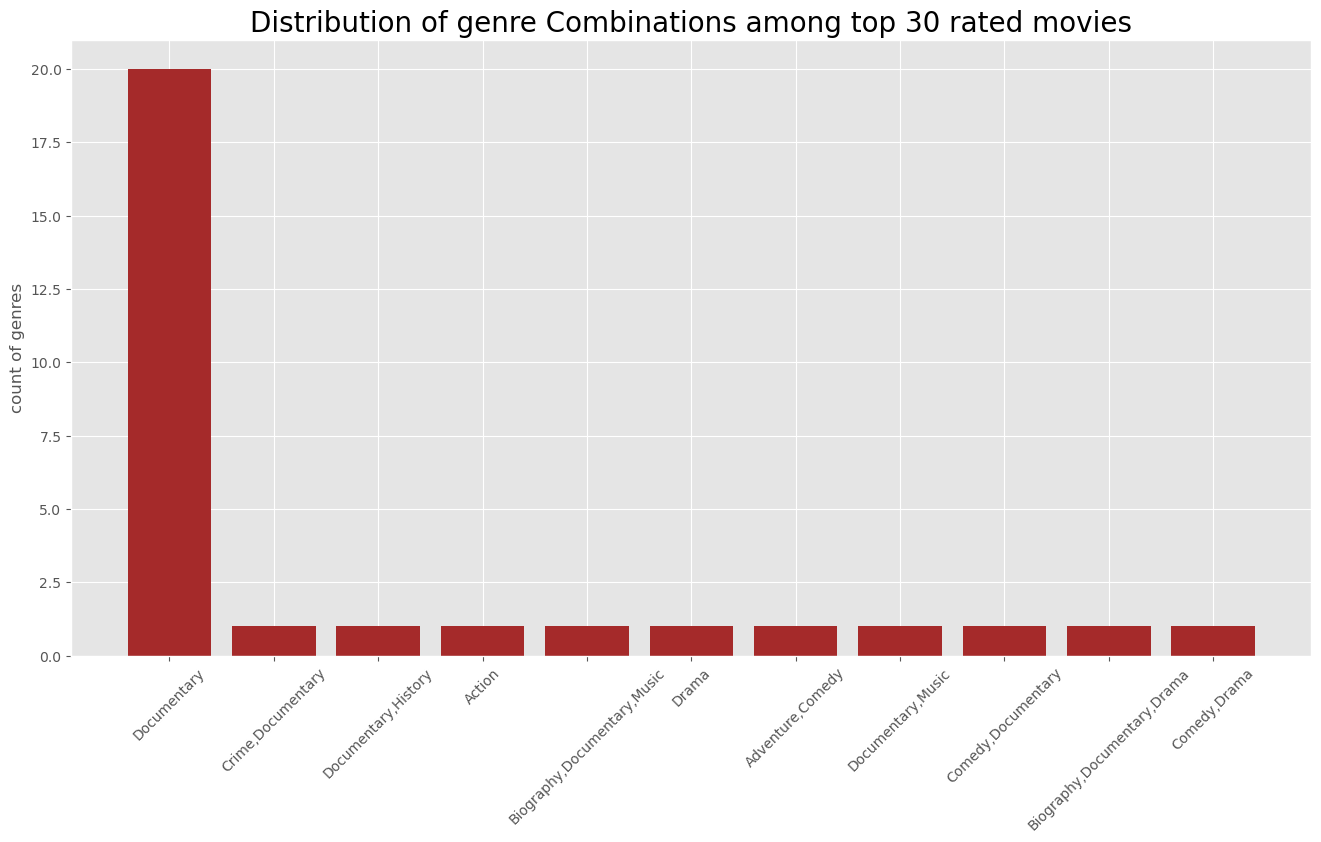

In [174]:
# genre value counts
genre_counts = top_thirty_rated.genres.value_counts()

#ploting the distribution of genre among the top thirty-rated movies
fig,ax = plt.subplots(figsize=(16,8))

plt.style.use('default')
x=genre_counts.index
y=genre_counts.values
ax.bar(x,y ,color='brown')

#labels
ax.set_title('Distribution of genre Combinations among top 30 rated movies', fontsize = 20)
ax.set_ylabel('count of genres')
ax.tick_params(axis="x", labelrotation=45)

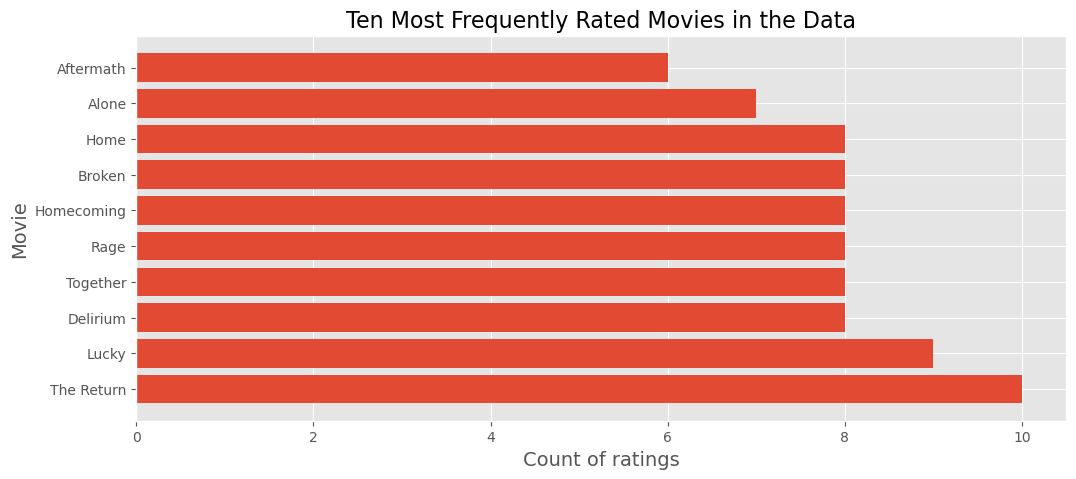

In [191]:
# return number of rows associated to each title
top_ten_movies = movie_basics_and_ratings_df.groupby("title").size().sort_values(ascending=False)[:10]

plt.style.use('ggplot')

# plot the counts
plt.figure(figsize=(12, 5))
plt.barh(y= top_ten_movies.index,
         width= top_ten_movies.values)
plt.title("Ten Most Frequently Rated Movies in the Data", fontsize=16)
plt.ylabel("Movie", fontsize=14)
plt.xlabel("Count of ratings", fontsize=14)
plt.show()

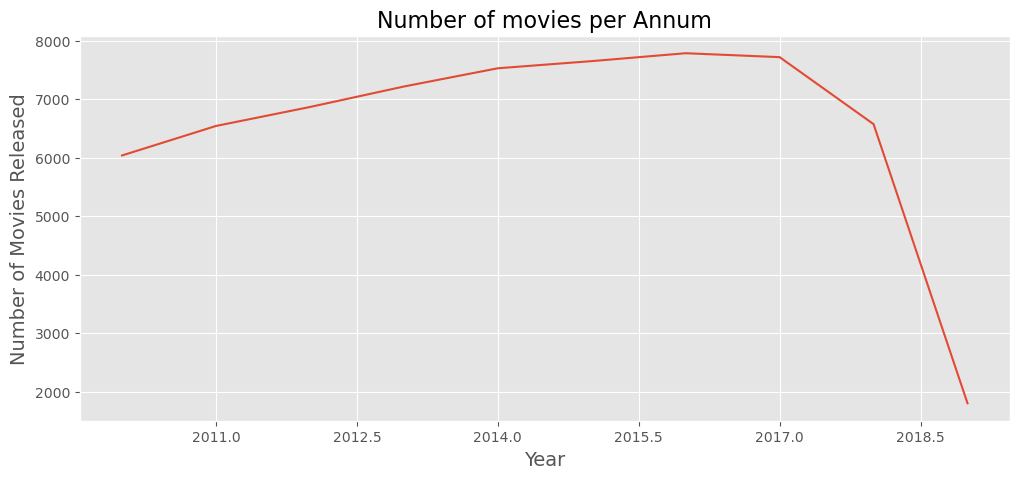

In [172]:
# return number of rows by the year 
movie_counts_by_year = movie_basics_and_ratings_df[["title", "start_year"]].groupby("start_year").size()

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(12, 5)) 
ax.plot(year_counts.index, year_counts.values)
ax.xaxis.set_major_locator(plt.MaxNLocator(9))
plt.title("Number of movies per Annum", fontsize=16)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("Number of Movies Released", fontsize=14)
plt.show()

Text(0, 0.5, 'runtime minutes')

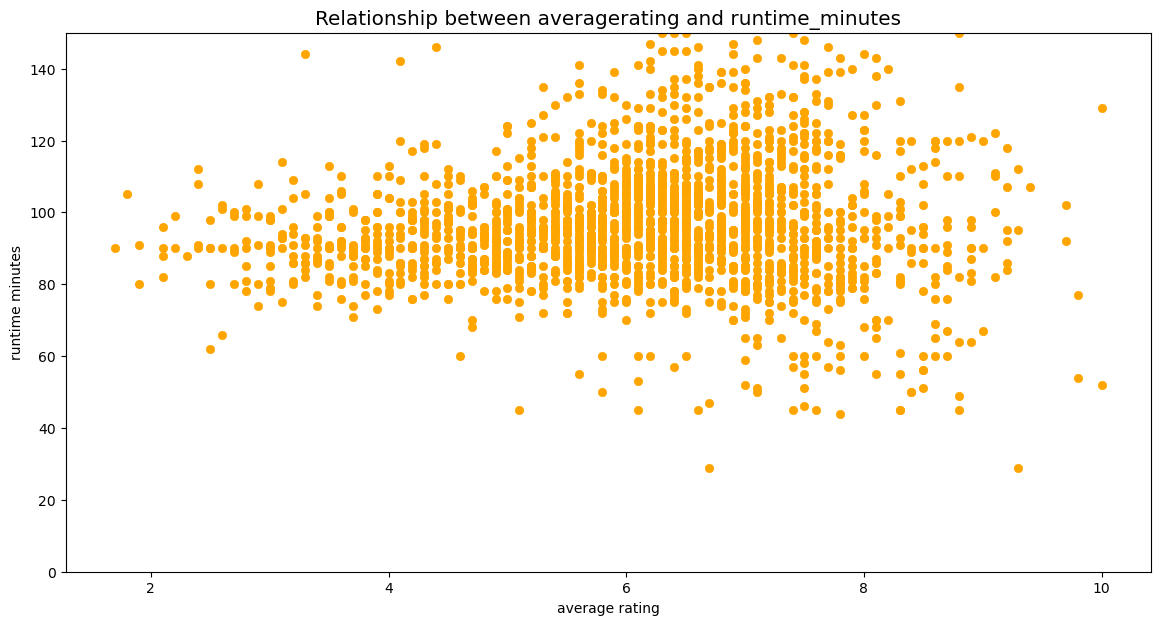

In [177]:
# Runtime against averagerating, for 20,000 entries

fig,ax = plt.subplots(figsize=(14,7))
plt.style.use('ggplot')
x=movie_basics_and_ratings_df['averagerating'][:2000]
y=movie_basics_and_ratings_df['runtime_minutes'][:2000]
ax.set_ylim(0,150)

ax.scatter(x,y ,color='orange')
ax.set_title('Relationship between averagerating and runtime_minutes')
ax.set_xlabel('average rating')
ax.set_ylabel('runtime minutes')

In [176]:
#correlation between runtime_minutes and averagerating
rating_mins_corr = movie_basics_and_ratings_df['averagerating'].corr(movie_basics_and_ratings_df['runtime_minutes'])
rating_mins_corr

-0.007075893850882621

The is a weak, negative correlation between 'runtime_minutes' and 'averagerating'. Hence no clear linear relationship between runtime_minutes and averagerating

Text(0, 0.5, 'runtime minutes')

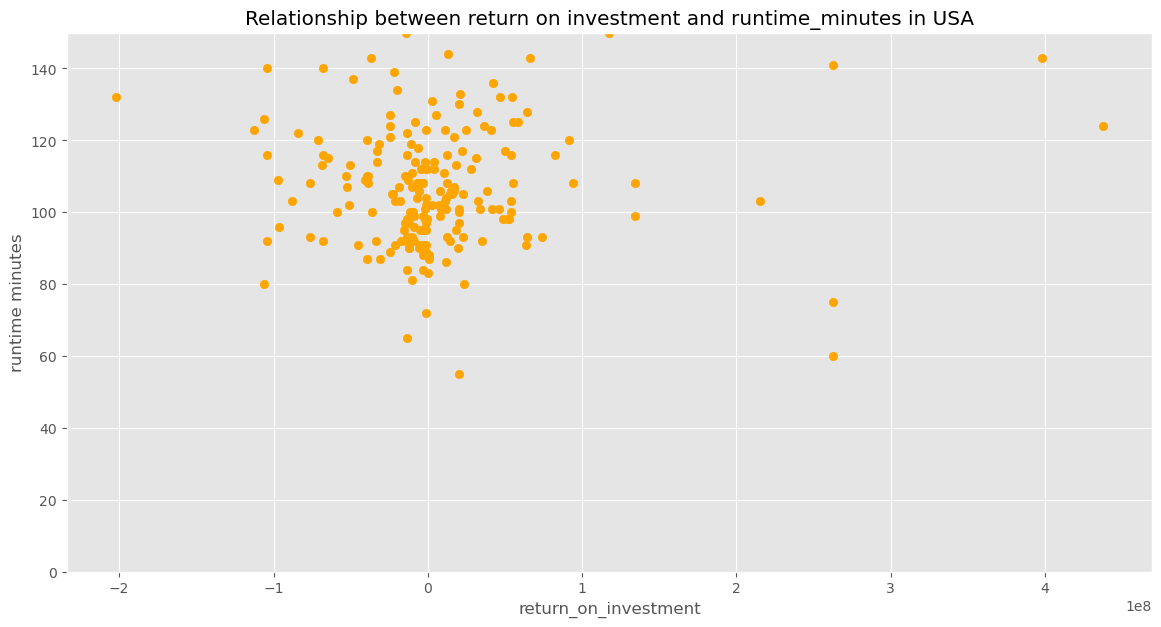

In [189]:
#correlation between runtime and return on investment
#movie_basics_ratings_revenue_df['total_revenue'] = movie_basics_ratings_revenue_df['domestic_gross_usd'] +\
                #movie_basics_ratings_revenue_df['worldwide_gross_usd']

movie_basics_ratings_revenue_df['return_on_investment'] = movie_basics_ratings_revenue_df['domestic_gross_usd'] - \
                       movie_basics_ratings_revenue_df['production_budget_usd']


fig,ax = plt.subplots(figsize=(14,7))
plt.style.use('ggplot')
x=movie_basics_ratings_revenue_df['return_on_investment'][:200]
y=movie_basics_ratings_revenue_df['runtime_minutes'][:200]
ax.set_ylim(0,150)

ax.scatter(x,y ,color='orange')
ax.set_title('Relationship between return on investment and runtime_minutes in USA')
ax.set_xlabel('return_on_investment')
ax.set_ylabel('runtime minutes')

In [190]:
# Correlation between domestic_gross_usd and runtime_minutes
rev_mins_corr = movie_basics_ratings_revenue_df['domestic_gross_usd'].corr(movie_basics_ratings_revenue_df['runtime_minutes'])
rev_mins_corr

0.1960137170551597

There exists a weak, positive correlation between domestic_gross_usd and runtime_minutes, implying that an increase in runtime minutes causes a weak rise in return on investment.